In [66]:
import pandas as pd 
import matplotlib
import numpy as np
import sklearn
pd.options.display.max_rows = 200
raw_train_data = pd.read_csv('train.csv')
data = raw_train_data.copy(deep=True)

## Data cleanage ##

In [67]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
numerical_features = [
    "LotFrontage",
    "LotArea",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal"
]

time_features = ["MoSold", "YrSold", "GarageYrBlt", "YearBuilt","YearRemodAdd"]
time_and_numerical_features = numerical_features + time_features
categorical_features = set(data.columns) - set(time_and_numerical_features)
print(categorical_features)
print(len(categorical_features) + len(numerical_features) + len(time_features) == data.shape[1])

{'LandSlope', 'FireplaceQu', 'GarageType', 'ExterCond', 'MasVnrType', 'Heating', 'BsmtFinType1', 'Condition1', 'GarageFinish', 'Condition2', 'Id', 'GarageCond', 'ExterQual', 'OverallQual', 'LandContour', 'KitchenQual', 'BsmtExposure', 'Foundation', 'GarageQual', 'BldgType', 'BsmtFinType2', 'SalePrice', 'Street', 'BsmtCond', 'OverallCond', 'Utilities', 'SaleType', 'RoofStyle', 'Alley', 'Exterior2nd', 'RoofMatl', 'Functional', 'CentralAir', 'PoolQC', 'MSSubClass', 'LotConfig', 'Fence', 'PavedDrive', 'BsmtQual', 'MiscFeature', 'LotShape', 'Exterior1st', 'HeatingQC', 'HouseStyle', 'Neighborhood', 'MSZoning', 'SaleCondition', 'Electrical'}
True


In [69]:
data[numerical_features]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,2,548,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,2,460,298,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,2,608,0,42,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,3,642,0,35,272,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,3,836,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,...,1,2,460,0,40,0,0,0,0,0
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,...,2,2,500,349,0,0,0,0,0,0
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,...,2,1,252,0,60,0,0,0,0,2500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,...,0,1,240,366,0,112,0,0,0,0


In [70]:

continious_features = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    '3SsnPorch',
    'EnclosedPorch',
    'ScreenPorch',
    'PoolArea',
]
discrete_features = [
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageCars',
    'MiscVal'
]
print(len(discrete_features) + len(continious_features) == len(numerical_features))


True


In [71]:
num_of_rows = 1460

def calculate_missing_percentage(data, features, num_of_rows=1460):
    perc_missing = pd.DataFrame(columns=['Name', 'Percentage'])
    for feature in features:
        row = {'Name':feature,'Percentage' : (data[feature].isna().sum() / num_of_rows)*100}
        perc_missing = pd.concat([perc_missing, pd.DataFrame([row])], ignore_index=True)
    return perc_missing

perc_of_missing_for_time_features = calculate_missing_percentage(data, time_features, num_of_rows)
print("Missing percentage for time_features:")
print(perc_of_missing_for_time_features[perc_of_missing_for_time_features['Percentage'] > 0].sort_values(ascending=False, by='Percentage'))


perc_of_missing_for_discrete_features = calculate_missing_percentage(data, discrete_features, num_of_rows)
print("Missing percentage for discrete features:")
print(perc_of_missing_for_discrete_features[perc_of_missing_for_discrete_features['Percentage'] > 0].sort_values(ascending=False, by='Percentage'))

perc_of_missing_for_continious_features = calculate_missing_percentage(data, continious_features, num_of_rows)
print("Missing percentage for continuous features:")
print(perc_of_missing_for_continious_features[perc_of_missing_for_continious_features['Percentage'] > 0].sort_values(ascending=False, by='Percentage'))
 
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True)

perc_of_missing_for_time_features = calculate_missing_percentage(data, time_features, num_of_rows)
print("Missing percentage for time_features:")
print(perc_of_missing_for_time_features[perc_of_missing_for_time_features['Percentage'] > 0].sort_values(ascending=False, by='Percentage'))

Missing percentage for time_features:
          Name  Percentage
2  GarageYrBlt    5.547945
Missing percentage for discrete features:
Empty DataFrame
Columns: [Name, Percentage]
Index: []
Missing percentage for continuous features:
          Name  Percentage
0  LotFrontage   17.739726
2   MasVnrArea    0.547945
Missing percentage for time_features:
Empty DataFrame
Columns: [Name, Percentage]
Index: []


C:\Users\Max\AppData\Local\Temp\ipykernel_21084\3524748660.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perc_missing = pd.concat([perc_missing, pd.DataFrame([row])], ignore_index=True)
C:\Users\Max\AppData\Local\Temp\ipykernel_21084\3524748660.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perc_missing = pd.concat([perc_missing, pd.DataFrame([row])], ignore_index=True)
C:\Users\Max\AppData\Local\Temp\ipykernel_21084\3524748660.py:7: FutureWarning: The behavior of DataFrame concatenat

In [72]:
# it is possible that data for the MasVnrArea category will be missing because the cladding was not made of stone or brick

data['MasVnrArea'].fillna(0, inplace=True)

perc_of_missing_for_continious_features = calculate_missing_percentage(data, continious_features, num_of_rows)
print("Missing percentage for continuous features:")
print(perc_of_missing_for_continious_features[perc_of_missing_for_continious_features['Percentage'] > 0].sort_values(ascending=False, by='Percentage'))

Missing percentage for continuous features:
          Name  Percentage
0  LotFrontage   17.739726


C:\Users\Max\AppData\Local\Temp\ipykernel_21084\2792688382.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MasVnrArea'].fillna(0, inplace=True)
C:\Users\Max\AppData\Local\Temp\ipykernel_21084\3524748660.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perc_missing = pd

Text(0, 0.5, 'LotFrontage')

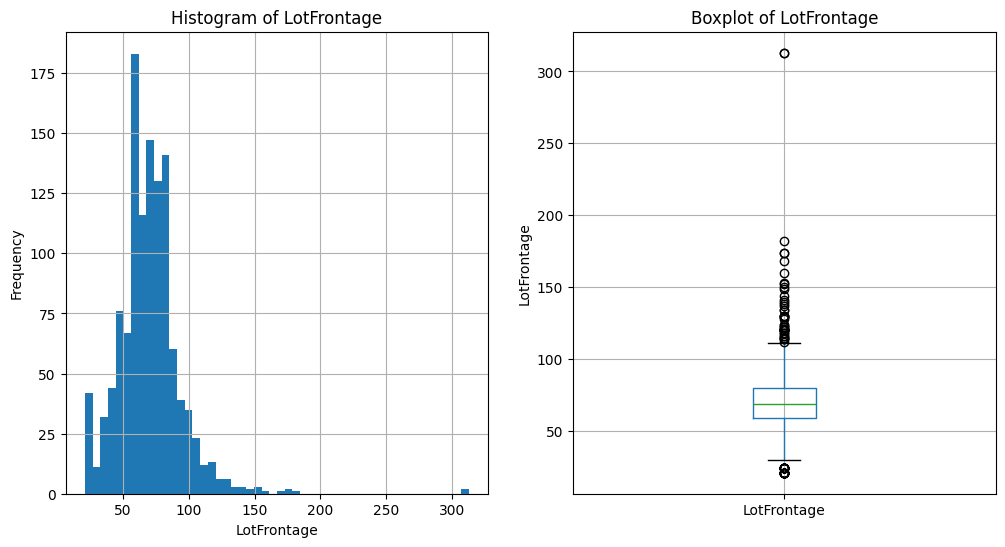

In [73]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6)) 


data['LotFrontage'].hist(ax=axs[0], bins=50)
axs[0].set_title('Histogram of LotFrontage')
axs[0].set_xlabel('LotFrontage')
axs[0].set_ylabel('Frequency')


data.boxplot(column='LotFrontage', ax=axs[1])
axs[1].set_title('Boxplot of LotFrontage')
axs[1].set_ylabel('LotFrontage')


Text(0, 0.5, 'LotFrontage')

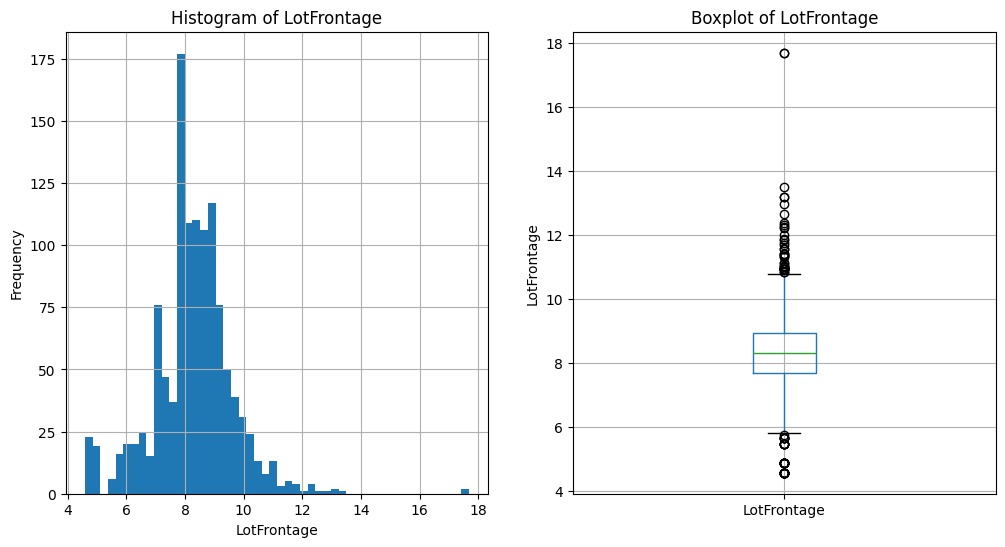

In [74]:
data['LotFrontage'] = np.sqrt(data['LotFrontage'])
fig, axs = matplotlib.pyplot.subplots(1, 2, figsize=(12, 6))  


data['LotFrontage'].hist(ax=axs[0], bins=50)
axs[0].set_title('Histogram of LotFrontage')
axs[0].set_xlabel('LotFrontage')
axs[0].set_ylabel('Frequency')


data.boxplot(column='LotFrontage', ax=axs[1])
axs[1].set_title('Boxplot of LotFrontage')
axs[1].set_ylabel('LotFrontage')

In [75]:
print("Missing values before filling:")
print(data['LotFrontage'].isna().sum())

# Заповнення відсутніх значень середнім значенням
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

# Перевірте кількість відсутніх значень після заповнення
print("Missing values after filling:")
print(data['LotFrontage'].isna().sum())

Missing values before filling:
259
Missing values after filling:
0


Text(0, 0.5, 'LotFrontage')

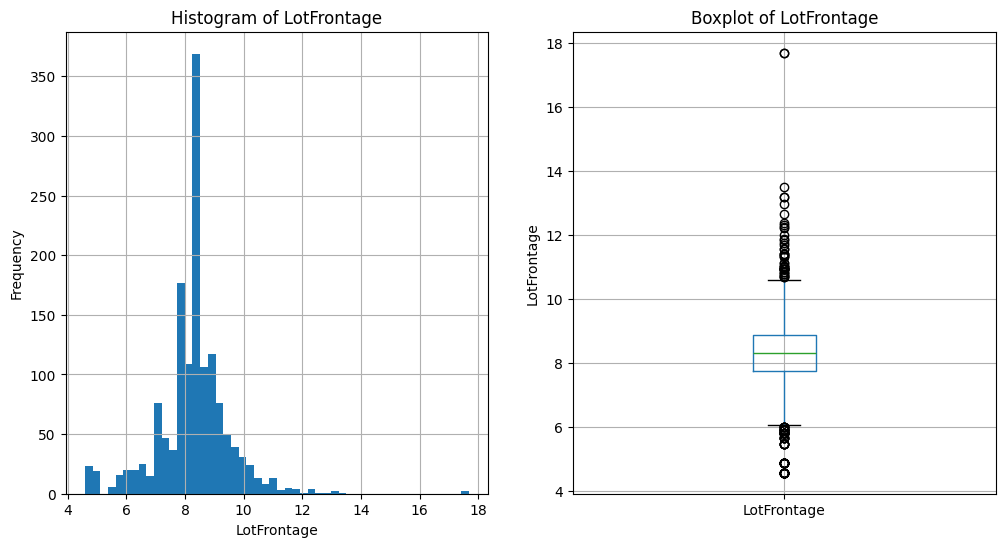

In [76]:
fig, axs = matplotlib.pyplot.subplots(1, 2, figsize=(12, 6))  


data['LotFrontage'].hist(ax=axs[0], bins=50)
axs[0].set_title('Histogram of LotFrontage')
axs[0].set_xlabel('LotFrontage')
axs[0].set_ylabel('Frequency')


data.boxplot(column='LotFrontage', ax=axs[1])
axs[1].set_title('Boxplot of LotFrontage')
axs[1].set_ylabel('LotFrontage')



In [77]:

categorical_features = list(categorical_features)
data[categorical_features].isna().sum().sort_values(ascending=False)


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageCond         81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtFinType1       37
BsmtQual           37
Electrical          1
KitchenQual         0
LandContour         0
OverallQual         0
ExterQual           0
Id                  0
Condition2          0
Heating             0
Condition1          0
LandSlope           0
ExterCond           0
SaleType            0
OverallCond         0
Street              0
BldgType            0
SalePrice           0
Foundation          0
Functional          0
RoofMatl            0
Exterior2nd         0
RoofStyle           0
Utilities           0
LotConfig           0
CentralAir          0
MSSubClass          0
PavedDrive          0
LotShape            0
HeatingQC           0
Exterior1st         0
HouseStyle          0
Neighborho

In [78]:

categorical_features = list(categorical_features)
data[categorical_features].isna().sum().sort_values(ascending=False)


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageCond         81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtFinType1       37
BsmtQual           37
Electrical          1
KitchenQual         0
LandContour         0
OverallQual         0
ExterQual           0
Id                  0
Condition2          0
Heating             0
Condition1          0
LandSlope           0
ExterCond           0
SaleType            0
OverallCond         0
Street              0
BldgType            0
SalePrice           0
Foundation          0
Functional          0
RoofMatl            0
Exterior2nd         0
RoofStyle           0
Utilities           0
LotConfig           0
CentralAir          0
MSSubClass          0
PavedDrive          0
LotShape            0
HeatingQC           0
Exterior1st         0
HouseStyle          0
Neighborho

In [87]:
data[['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu']] = data[['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu']].fillna("No")

data[categorical_features].isna().sum().sort_values(ascending=False)


garage_features = ['GarageQual','GarageType','GarageCond','GarageFinish']
basement_features = ['BsmtExposure','BsmtFinType2','BsmtQual','BsmtFinType1','BsmtCond']

data[garage_features] = data[garage_features].fillna("No garage")

data[basement_features] = data[basement_features].fillna("No basement")
print(data[categorical_features].isna().sum().sort_values(ascending=False))
data = data.dropna(subset=['Electrical'])
print(data[data['BsmtCond'].isna()])


print(data.isnull().sum().sort_values(ascending=False))


LandSlope        0
FireplaceQu      0
GarageType       0
ExterCond        0
MasVnrType       0
Heating          0
BsmtFinType1     0
Condition1       0
GarageFinish     0
Condition2       0
Id               0
GarageCond       0
ExterQual        0
OverallQual      0
LandContour      0
KitchenQual      0
BsmtExposure     0
Foundation       0
GarageQual       0
BldgType         0
BsmtFinType2     0
SalePrice        0
Street           0
BsmtCond         0
OverallCond      0
Utilities        0
SaleType         0
RoofStyle        0
Alley            0
Exterior2nd      0
RoofMatl         0
Functional       0
CentralAir       0
PoolQC           0
MSSubClass       0
LotConfig        0
Fence            0
PavedDrive       0
BsmtQual         0
MiscFeature      0
LotShape         0
Exterior1st      0
HeatingQC        0
HouseStyle       0
Neighborhood     0
MSZoning         0
SaleCondition    0
Electrical       0
dtype: int64
Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, S

## Data scaling ##

In [89]:
from sklearn import preprocessing
import numpy as np

y = data['SalePrice']
X = data.drop(['SalePrice'], axis=1)